In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-v0_8-darkgrid')
import warnings
warnings.filterwarnings('ignore')

#### Importing the liberaries

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test['id']

#### Loading the data

In [3]:
train.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [4]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 9 columns):
 #   Column           

#### Getting some info about the data

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5407.0,2703.000000,1561.010784,0.00,1351.50,2703.00,4054.50,5406.0
CementComponent,5407.0,299.168189,105.537682,102.00,213.70,297.20,375.00,540.0
BlastFurnaceSlag,5407.0,58.610579,83.417801,0.00,0.00,0.00,122.60,359.4
FlyAshComponent,5407.0,31.872795,54.605003,0.00,0.00,0.00,79.00,200.1
WaterComponent,5407.0,185.076235,18.517583,121.80,175.10,187.40,192.00,247.0
SuperplasticizerComponent,5407.0,4.108441,5.692296,0.00,0.00,0.00,8.05,32.2
CoarseAggregateComponent,5407.0,992.000718,77.148010,801.00,938.20,978.00,1047.00,1145.0
FineAggregateComponent,5407.0,771.219974,78.725253,594.00,734.30,781.20,821.00,992.6
AgeInDays,5407.0,51.751618,70.006975,1.00,7.00,28.00,56.00,365.0
Strength,5407.0,35.452071,16.401896,2.33,23.64,33.95,45.85,82.6


## Cleaning

In [6]:
train.drop(columns = 'id', inplace = True)
test.drop(columns = 'id', inplace = True)

In [7]:
train.duplicated().sum()

0

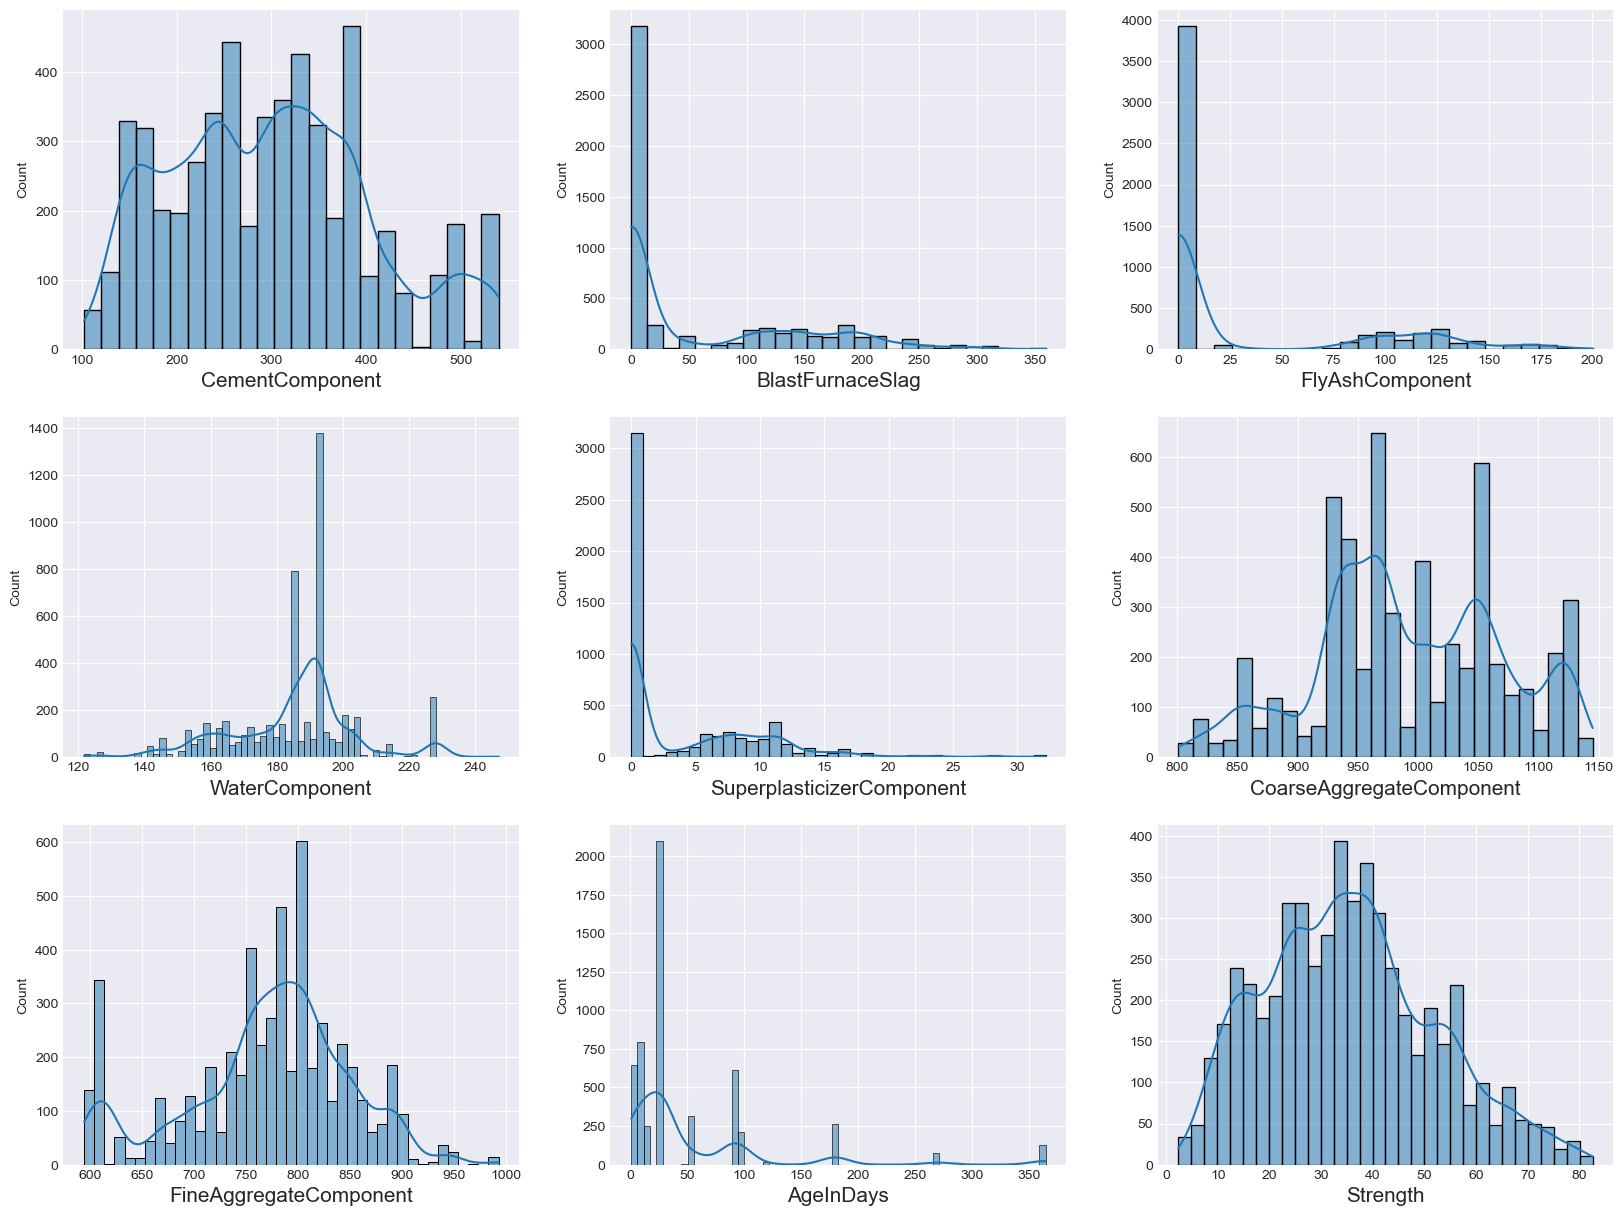

In [8]:
plt.figure(figsize = (20,15))
for i,col in enumerate(train):
    plt.subplot(3,3,i+1)
    sns.histplot(data = train, x=col, kde=True)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)

#### The features need to be scaled so i will do that later

### Handeling outliers

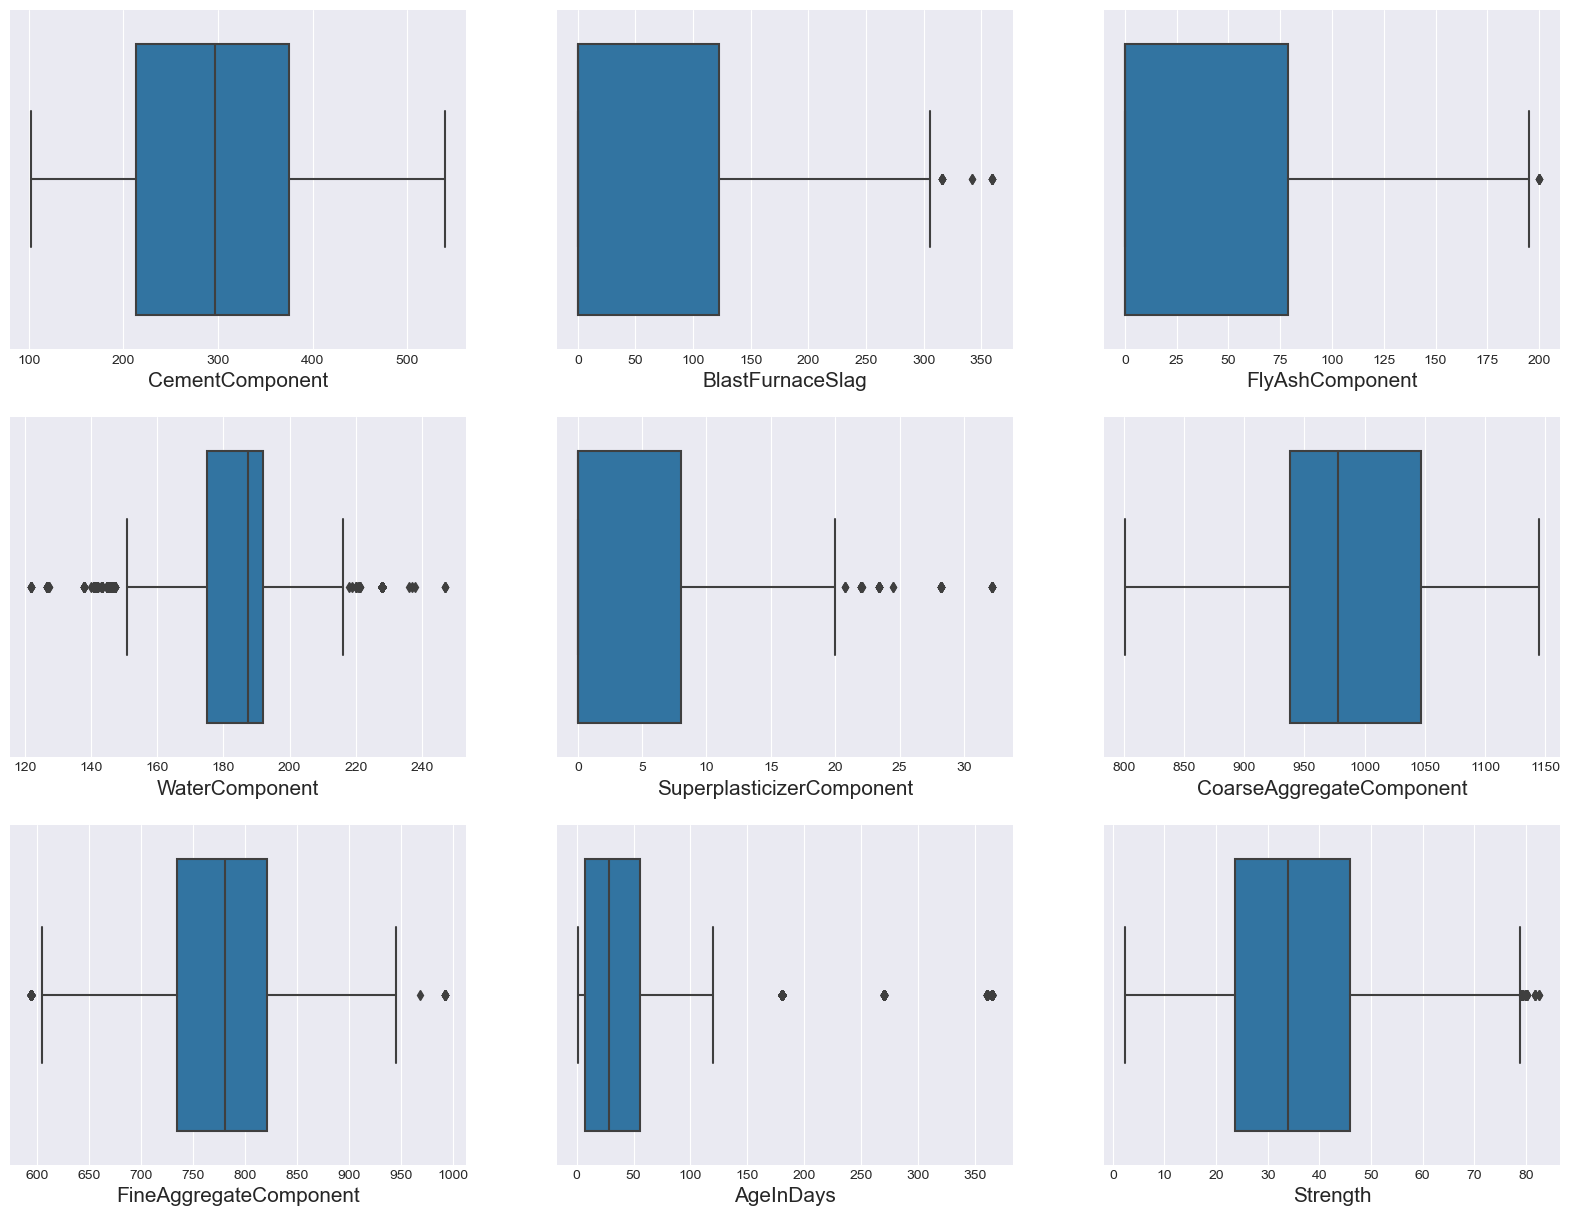

In [9]:
plt.figure(figsize=(20,15))
for i,col in enumerate(train):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = train,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

#### We have some outliers that need to be handeled

In [10]:
def detect_outliers(df):
    outliers= pd.DataFrame(columns=["Feature","Num of Outliers","Handled?"])
    for col in df.columns:
        #Return values at the given quantile
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        N_O_O = df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]
                   
        df.loc[(df[col] < fence_low),col] = fence_low
        df.loc[(df[col] > fence_high),col] = fence_high
        #let's fix them
        outliers = outliers.append({'Feature': col, "Num of Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
    return outliers

In [11]:
detect_outliers(train)

,Feature,Num of Outliers,Handled?
0,CementComponent,0,True
1,BlastFurnaceSlag,21,True
2,FlyAshComponent,5,True
3,WaterComponent,483,True
4,SuperplasticizerComponent,75,True
5,CoarseAggregateComponent,0,True
6,FineAggregateComponent,153,True
7,AgeInDays,467,True
8,Strength,33,True


#### Handeled the outliers

### Correlation

<AxesSubplot: >

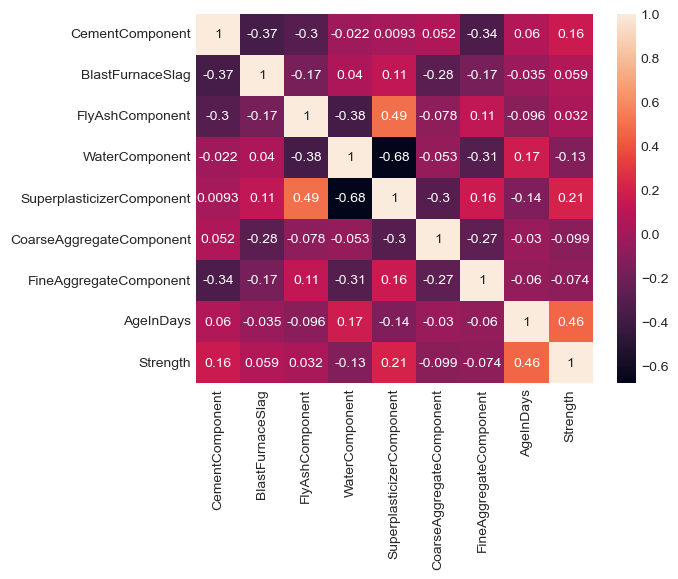

In [12]:
sns.heatmap(train.corr(), annot = True)

#### Looks like there is correlation between some features so i am going to use pca to extract new ones

In [13]:
feature_importance = train.corr()['Strength']
feature_importance.sort_values()

WaterComponent              -0.128461
CoarseAggregateComponent    -0.098541
FineAggregateComponent      -0.074138
FlyAshComponent              0.031636
BlastFurnaceSlag             0.058724
CementComponent              0.157957
SuperplasticizerComponent    0.207225
AgeInDays                    0.456142
Strength                     1.000000
Name: Strength, dtype: float64

## Feature Engineering

In [14]:
train['Cement-Age'] = train['CementComponent'] * train['AgeInDays']
train['WaterComponent_to_Cement_ratio'] = train['WaterComponent'] / (train['CementComponent'] + 1e-6)
train['Superplasticizerage_in_days'] = train['SuperplasticizerComponent'] * train['AgeInDays']

test['Cement-Age'] = test['CementComponent'] * test['AgeInDays']
test['WaterComponent_to_Cement_ratio'] = test['WaterComponent'] / (test['CementComponent'] + 1e-6)
test['Superplasticizer_age_in_days'] = test['SuperplasticizerComponent'] * test['AgeInDays']

## Splitting the data 

In [15]:
x = train.drop(columns ='Strength', axis = 1)
y = train['Strength']
print(f'x shape = {x.shape}')

x shape = (5407, 11)


#### Here we splitted the data into train and validation sets

## PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 11)
x = pca.fit_transform(x)
test = pca.transform(test)

## Scaling 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
test = scaler.transform(test) 

#### All the columns sre now scaled

## Modeling

### LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

### Decision trees regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

DecisionTreeRegressor()

### Random forest regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
rnf_reg = RandomForestRegressor(n_estimators = 1170, 
                                max_depth = 7, 
                                min_samples_split = 6, 
                                min_samples_leaf = 6,
                                max_features = 'auto', 
                                random_state = 42, 
                                verbose = 1)
rnf_reg.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:   19.0s finished


RandomForestRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=6,
                      n_estimators=1170, random_state=42, verbose=1)

### Gradiantboost regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
gdb_reg = GradientBoostingRegressor(learning_rate = 0.02, 
                                    n_estimators = 412, 
                                    max_depth = 3)
gdb_reg.fit(x,y)

GradientBoostingRegressor(learning_rate=0.02, n_estimators=412)

### XGB regressor

In [22]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(learning_rate = 0.02, 
                              n_estimators = 614, 
                              max_depth = 3,
                              min_child_weight = 88,
                              gamma = 0.029728020189525316,
                              alpha = 0.0001899367546124841,
                              colsample_bytree = 0.45376463478381773,
                              subsample = 0.4804671364112557)
xgb_reg.fit(x,y)

XGBRegressor(alpha=0.0001899367546124841, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.45376463478381773, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.029728020189525316, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=88, missing=nan,
             monotone_constraints=None, n_estimators=614, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

### Testing train accuracy

In [23]:
from sklearn.model_selection import cross_val_score

scores_lin = cross_val_score(lin_reg, x, y, scoring= 'neg_root_mean_squared_error', cv = 10)
print(f'Linear regression negative root mean squared error = {scores_lin.mean()}')

scores_tree = cross_val_score(tree_reg, x, y, scoring= 'neg_root_mean_squared_error', cv = 10)
print(f'Decision tree negative root mean squared error = {scores_tree.mean()}')

scores_rnf = cross_val_score(rnf_reg, x, y, scoring= 'neg_root_mean_squared_error', cv = 10)
print(f'Random forest negative root mean squared error = {scores_rnf.mean()}')

scores_gdb = cross_val_score(gdb_reg, x, y, scoring= 'neg_root_mean_squared_error', cv = 10)
print(f'Gradiantboost regressor negative root mean squared error = {scores_gdb.mean()}')

scores_xgb = cross_val_score(xgb_reg, x, y, scoring= 'neg_root_mean_squared_error', cv = 10)
print(f'XGB regressor negative root mean squared error = {scores_xgb.mean()}')

Linear regression negative root mean squared error = -13.47614175771567
Decision tree negative root mean squared error = -14.927375142199992


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:   16.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:   16.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:   16.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Random forest negative root mean squared error = -12.135574617884817
Gradiantboost regressor negative root mean squared error = -12.122854641690816
XGB regressor negative root mean squared error = -12.105914369683621


#### I will get my final predictions from the avg of the best 3 models

In [24]:
final_prediction = (rnf_reg.predict(test) + xgb_reg.predict(test) + gdb_reg.predict(test)) / 3 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    0.3s finished


In [25]:
df = pd.DataFrame({'id':test_ids.values, 'Strength': final_prediction})

In [26]:
df.head()

,id,Strength
0,5407,41.891380
1,5408,19.376810
2,5409,34.329955
3,5410,47.988008
4,5411,31.944739


In [27]:
df.to_csv('Final predictions.csv',index=False)